In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3
from nltk.stem.snowball import SnowballStemmer
import string
from nltk.stem import PorterStemmer

In [2]:
raw_text=''
for line in open(r'C:\Users\74716\Documents\UN\all_txt.txt', 'r',encoding='utf8').readlines():    
        raw_text += line

In [3]:
corpus=[]
for line in open(r'C:\Users\74716\Documents\UN\all_txt.txt', 'r',encoding='utf8').readlines():   
        corpus.append(line)

In [39]:
corpus_df=pd.DataFrame(corpus)

In [5]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords_load=pd.read_excel(r'C:\Users\74716\Documents\Text analytics\stopwords.xlsx',header=None)
for i in range(len(stopwords_load)):
    stopwords.append(stopwords_load[0][i])

In [6]:
value = [
    ('US', 'United States'),
    ('AF', 'Afghanistan'),
    ('AL', 'Albania'),
    ('DZ', 'Algeria'),
    ('AS', 'American Samoa'),
    ('AD', 'Andorra'),
    ('AO', 'Angola'),
    ('AI', 'Anguilla'),
    ('AQ', 'Antarctica'),
    ('AG', 'Antigua And Barbuda'),
    ('AR', 'Argentina'),
    ('AM', 'Armenia'),
    ('AW', 'Aruba'),
    ('AU', 'Australia'),
    ('AT', 'Austria'),
    ('AZ', 'Azerbaijan'),
    ('BS', 'Bahamas'),
    ('BH', 'Bahrain'),
    ('BD', 'Bangladesh'),
    ('BB', 'Barbados'),
    ('BY', 'Belarus'),
    ('BE', 'Belgium'),
    ('BZ', 'Belize'),
    ('BJ', 'Benin'),
    ('BM', 'Bermuda'),
    ('BT', 'Bhutan'),
    ('BO', 'Bolivia'),
    ('BA', 'Bosnia And Herzegowina'),
    ('BW', 'Botswana'),
    ('BV', 'Bouvet Island'),
    ('BR', 'Brazil'),
    ('BN', 'Brunei Darussalam'),
    ('BG', 'Bulgaria'),
    ('BF', 'Burkina Faso'),
    ('BI', 'Burundi'),
    ('KH', 'Cambodia'),
    ('CM', 'Cameroon'),
    ('CA', 'Canada'),
    ('CV', 'Cape Verde'),
    ('KY', 'Cayman Islands'),
    ('CF', 'Central African Rep'),
    ('TD', 'Chad'),
    ('CL', 'Chile'),
    ('CN', 'China'),
    ('CX', 'Christmas Island'),
    ('CC', 'Cocos Islands'),
    ('CO', 'Colombia'),
    ('KM', 'Comoros'),
    ('CG', 'Congo'),
    ('CK', 'Cook Islands'),
    ('CR', 'Costa Rica'),
    ('CI', 'Cote D`ivoire'),
    ('HR', 'Croatia'),
    ('CU', 'Cuba'),
    ('CY', 'Cyprus'),
    ('CZ', 'Czech Republic'),
    ('DK', 'Denmark'),
    ('DJ', 'Djibouti'),
    ('DM', 'Dominica'),
    ('DO', 'Dominican Republic'),
    ('TP', 'East Timor'),
    ('EC', 'Ecuador'),
    ('EG', 'Egypt'),
    ('SV', 'El Salvador'),
    ('GQ', 'Equatorial Guinea'),
    ('ER', 'Eritrea'),
    ('EE', 'Estonia'),
    ('ET', 'Ethiopia'),
    ('FK', 'Falkland Islands (Malvinas)'),
    ('FO', 'Faroe Islands'),
    ('FJ', 'Fiji'),
    ('FI', 'Finland'),
    ('FR', 'France'),
    ('GF', 'French Guiana'),
    ('PF', 'French Polynesia'),
    ('TF', 'French S. Territories'),
    ('GA', 'Gabon'),
    ('GM', 'Gambia'),
    ('GE', 'Georgia'),
    ('DE', 'Germany'),
    ('GH', 'Ghana'),
    ('GI', 'Gibraltar'),
    ('GR', 'Greece'),
    ('GL', 'Greenland'),
    ('GD', 'Grenada'),
    ('GP', 'Guadeloupe'),
    ('GU', 'Guam'),
    ('GT', 'Guatemala'),
    ('GN', 'Guinea'),
    ('GW', 'Guinea-bissau'),
    ('GY', 'Guyana'),
    ('HT', 'Haiti'),
    ('HN', 'Honduras'),
    ('HK', 'Hong Kong'),
    ('HU', 'Hungary'),
    ('IS', 'Iceland'),
    ('IN', 'India'),
    ('ID', 'Indonesia'),
    ('IR', 'Iran'),
    ('IQ', 'Iraq'),
    ('IE', 'Ireland'),
    ('IL', 'Israel'),
    ('IT', 'Italy'),
    ('JM', 'Jamaica'),
    ('JP', 'Japan'),
    ('JO', 'Jordan'),
    ('KZ', 'Kazakhstan'),
    ('KE', 'Kenya'),
    ('KI', 'Kiribati'),
    ('KP', 'Korea (North)'),
    ('KR', 'Korea (South)'),
    ('KW', 'Kuwait'),
    ('KG', 'Kyrgyzstan'),
    ('LA', 'Laos'),
    ('LV', 'Latvia'),
    ('LB', 'Lebanon'),
    ('LS', 'Lesotho'),
    ('LR', 'Liberia'),
    ('LY', 'Libya'),
    ('LI', 'Liechtenstein'),
    ('LT', 'Lithuania'),
    ('LU', 'Luxembourg'),
    ('MO', 'Macau'),
    ('MK', 'Macedonia'),
    ('MG', 'Madagascar'),
    ('MW', 'Malawi'),
    ('MY', 'Malaysia'),
    ('MV', 'Maldives'),
    ('ML', 'Mali'),
    ('MT', 'Malta'),
    ('MH', 'Marshall Islands'),
    ('MQ', 'Martinique'),
    ('MR', 'Mauritania'),
    ('MU', 'Mauritius'),
    ('YT', 'Mayotte'),
    ('MX', 'Mexico'),
    ('FM', 'Micronesia'),
    ('MD', 'Moldova'),
    ('MC', 'Monaco'),
    ('MN', 'Mongolia'),
    ('MS', 'Montserrat'),
    ('MA', 'Morocco'),
    ('MZ', 'Mozambique'),
    ('MM', 'Myanmar'),
    ('NA', 'Namibia'),
    ('NR', 'Nauru'),
    ('NP', 'Nepal'),
    ('NL', 'Netherlands'),
    ('AN', 'Netherlands Antilles'),
    ('NC', 'New Caledonia'),
    ('NZ', 'New Zealand'),
    ('NI', 'Nicaragua'),
    ('NE', 'Niger'),
    ('NG', 'Nigeria'),
    ('NU', 'Niue'),
    ('NF', 'Norfolk Island'),
    ('MP', 'Northern Mariana Islands'),
    ('NO', 'Norway'),
    ('OM', 'Oman'),
    ('PK', 'Pakistan'),
    ('PW', 'Palau'),
    ('PA', 'Panama'),
    ('PG', 'Papua New Guinea'),
    ('PY', 'Paraguay'),
    ('PE', 'Peru'),
    ('PH', 'Philippines'),
    ('PN', 'Pitcairn'),
    ('PL', 'Poland'),
    ('PT', 'Portugal'),
    ('PR', 'Puerto Rico'),
    ('QA', 'Qatar'),
    ('RE', 'Reunion'),
    ('RO', 'Romania'),
    ('RU', 'Russian Federation'),
    ('RW', 'Rwanda'),
    ('KN', 'Saint Kitts And Nevis'),
    ('LC', 'Saint Lucia'),
    ('VC', 'St Vincent/Grenadines'),
    ('WS', 'Samoa'),
    ('SM', 'San Marino'),
    ('ST', 'Sao Tome'),
    ('SA', 'Saudi Arabia'),
    ('SN', 'Senegal'),
    ('SC', 'Seychelles'),
    ('SL', 'Sierra Leone'),
    ('SG', 'Singapore'),
    ('SK', 'Slovakia'),
    ('SI', 'Slovenia'),
    ('SB', 'Solomon Islands'),
    ('SO', 'Somalia'),
    ('ZA', 'South Africa'),
    ('ES', 'Spain'),
    ('LK', 'Sri Lanka'),
    ('SH', 'St. Helena'),
    ('PM', 'St.Pierre'),
    ('SD', 'Sudan'),
    ('SR', 'Suriname'),
    ('SZ', 'Swaziland'),
    ('SE', 'Sweden'),
    ('CH', 'Switzerland'),
    ('SY', 'Syrian Arab Republic'),
    ('TW', 'Taiwan'),
    ('TJ', 'Tajikistan'),
    ('TZ', 'Tanzania'),
    ('TH', 'Thailand'),
    ('TG', 'Togo'),
    ('TK', 'Tokelau'),
    ('TO', 'Tonga'),
    ('TT', 'Trinidad And Tobago'),
    ('TN', 'Tunisia'),
    ('TR', 'Turkey'),
    ('TM', 'Turkmenistan'),
    ('TV', 'Tuvalu'),
    ('UG', 'Uganda'),
    ('UA', 'Ukraine'),
    ('AE', 'United Arab Emirates'),
    ('UK', 'United Kingdom'),
    ('UY', 'Uruguay'),
    ('UZ', 'Uzbekistan'),
    ('VU', 'Vanuatu'),
    ('VA', 'Vatican City State'),
    ('VE', 'Venezuela'),
    ('VN', 'Viet Nam'),
    ('VG', 'Virgin Islands (British)'),
    ('VI', 'Virgin Islands (U.S.)'),
    ('EH', 'Western Sahara'),
    ('YE', 'Yemen'),
    ('YU', 'Yugoslavia'),
    ('ZR', 'Zaire'),
    ('ZM', 'Zambia'),
    ('ZW', 'Zimbabwe')
]


In [7]:
country_stopwords=list(pd.DataFrame(value)[1])
for i in range(len(country_stopwords)):
    stopwords.append(country_stopwords[i])

In [8]:
stemmer = SnowballStemmer('english')
stopwords_add=['cyber','security','cybersecurity','s','1st', '21st', '60-day','a/r','2nd','3rd', '44th','also','\'s','government'
              ,'information','data','polica']
for i in stopwords_add:
    stopwords.append(i)
stopwords.extend(country_stopwords)

In [9]:
def get_tokens(text):
    lower = text.lower()
    #remove the punctuation using the character deletion step of translate
    translator = str.maketrans("","",string.punctuation) 
    new_text = lower.translate(translator)   
    tokens = nltk.word_tokenize(new_text)
    return tokens

In [10]:
#ps = PorterStemmer()
#porter =nltk.PorterStemmer()
#clean_text=[]
#for i in range(len(corpus)):
#    words_token= get_tokens(corpus[i])
    #mystopwords = stopwords.words('english')
 #   filtered_sentences = [w for w in words_token if w.isalpha() if w not in stopwords]
  #  clean_sentence=' '.join(filtered_sentences)
   # clean_text.append(clean_sentence)

In [11]:
#clean_text

## Tf-idf Matrix

In [12]:
def tokenize_and_stem(text):
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if len(word)>3]
    filtered_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    stems=[stemmer.stem(t) for t in filtered_tokens if t not in stopwords]
    return stems

In [13]:
def tokenize_only(text):
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.lower() not in stopwords if len(word)>3]
    filtered_tokens=[]
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    return filtered_tokens

In [14]:
totalvocab_stemmed = []
totalvocab_tokenized = []

allwords_stemmed = tokenize_and_stem(raw_text)
totalvocab_stemmed.extend(allwords_stemmed)
    
allwords_tokenized = tokenize_only(raw_text)
totalvocab_tokenized.extend(allwords_tokenized)

In [15]:
vocab_frame=pd.DataFrame({'word':totalvocab_tokenized},index=totalvocab_stemmed)
print('there are '+ str(vocab_frame.shape[0])+' itmes in vocab_frame')

there are 319239 itmes in vocab_frame


In [16]:
vocab_frame.head(15)

,word
turkey,turkey
communic,communication
technolog,technologies
ict,icts
spread,spreading
rapid,rapidly
ict,icts
play,playing
import,important
role,roles


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,min_df=10,stop_words=stopwords,use_idf=True, tokenizer=tokenize_and_stem,ngram_range=(1,3))

In [18]:
%time tfidf_matrix=tfidf_vectorizer.fit_transform(corpus)

Wall time: 31 s


In [19]:
print(tfidf_matrix.shape)

(27297, 5125)


In [20]:
terms = tfidf_vectorizer.get_feature_names()

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
dist=cosine_similarity(tfidf_matrix)

In [89]:
dist=pd.DataFrame(dist)
dist['corpus']=corpus

In [90]:
from sklearn.utils import shuffle
dist_shuffle= shuffle(dist,random_state=0)

In [91]:
dist_shuffle_matrix=dist_shuffle.drop('corpus',axis=1)

In [25]:
#dist_shuffle.to_csv('dis_shuffle.csv')

## KMeans 跳过这个

In [132]:
from sklearn.cluster import KMeans
num_clusters =6
km=KMeans(n_clusters=num_clusters,random_state=0)
%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

#from sklearn.externals import joblib
#joblib.dump(km, 'doc_cluster.pkl')

Wall time: 2min 47s


In [112]:
cluster=km.labels_.tolist()

In [133]:
cluster_df=pd.DataFrame(cluster)

In [134]:
corpus_df['cluster']=cluster_df[0]

In [135]:
corpus_df['cluster']

0        5
1        1
2        5
3        1
4        5
5        5
6        5
7        3
8        0
9        4
10       5
11       5
12       4
13       5
14       5
15       0
16       4
17       5
18       5
19       5
20       5
21       5
22       5
23       5
24       4
25       5
26       5
27       5
28       3
29       4
        ..
27267    2
27268    5
27269    4
27270    0
27271    2
27272    5
27273    4
27274    5
27275    5
27276    5
27277    5
27278    5
27279    0
27280    5
27281    1
27282    2
27283    5
27284    0
27285    5
27286    5
27287    5
27288    5
27289    1
27290    5
27291    5
27292    5
27293    0
27294    5
27295    5
27296    2
Name: cluster, Length: 27297, dtype: int64

In [70]:
corpus_df.to_csv('Kmeans 22 clusters.csv')

In [120]:
metrics.silhouette_score(tfidf_matrix,label)

0.011386089613263931

In [119]:
label = km.labels_

In [107]:
from sklearn import metrics

In [136]:
from __future__ import print_function

print('Top terms per cluster:')
print()

order_centroids =km.cluster_centers_.argsort()[:,::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i,:10]:
        print(' %s,' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8','ignore'),end=',')
    print()
    print()
    
    print('Cluster %d text:' % i, end='')
    for text in corpus_df.ix[i]:
        print(' %s' % text,end='')
    print()
    print()

Top terms per cluster:

Cluster 0 words: b'threats',, b'responsibility',, b'risks',, b'management',, b'incident',, b'systems',, b'assessments',, b'vulnerabilities',, b'cyberspace',, b'computer',,

Cluster 0 text: ﻿In Turkey, the use of information and communication technologies (ICTs) has been spreading rapidly and ICTs are playing important roles in all aspects of our lives.
 5

Cluster 1 words: b'sector',, b'private',, b'private',, b'public',, b'public',, b'public',, b'public',, b'developed',, b'work',, b'business',,

Cluster 1 text: In addition to public sector organizations, organizations which provide services in critical infrastructure sectors like energy, water resources, health, transportation, communication and financial services have also been heavily using information and communication systems.
 1

Cluster 2 words: b'developed',, b'technologies',, b'research',, b'research',, b'policies',, b'implementation',, b'systems',, b'national',, b'supported',, b'capabilities',,

Cluste

## PCA

In [121]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab
from matplotlib import cm

In [127]:
pca1=PCA(n_components=200)
%time pca.fit(tfidf_matrix)
#print('\n PC components \n')
#print(pca.components_)


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

In [129]:
print(tfidf_matrix)

  (0, 711)	0.14706695956934607
  (0, 4691)	0.13365867517859262
  (0, 2057)	0.43840297510383425
  (0, 4391)	0.2424403459835784
  (0, 3778)	0.21288607855831787
  (0, 3406)	0.2144633686159812
  (0, 2123)	0.16186384100921705
  (0, 4048)	0.18170934647863948
  (0, 278)	0.223352015041407
  (0, 2607)	0.22158380376886103
  (0, 719)	0.20481429463174242
  (0, 4699)	0.30691603283144847
  (0, 3407)	0.2837126398537271
  (0, 2129)	0.26207621605409864
  (0, 720)	0.30691603283144847
  (0, 3408)	0.2837126398537271
  (1, 711)	0.2349219674231582
  (1, 97)	0.14753153763045507
  (1, 3717)	0.1082438420387216
  (1, 4120)	0.20773050705946722
  (1, 3226)	0.2624948778969896
  (1, 3690)	0.10985552538730765
  (1, 4213)	0.2110475193128901
  (1, 971)	0.11288652960602658
  (1, 2260)	0.10210155857548305
  :	:
  (27295, 3650)	0.19406844131514614
  (27295, 4417)	0.20658775299795226
  (27295, 2358)	0.26942550598620796
  (27295, 4917)	0.2657021554169268
  (27295, 4809)	0.2963489628617754
  (27295, 5095)	0.3633302302267617

In [131]:
dist_shuffle_matrix

,0,1,2,3,4,5,6,7,8,9,...,27287,27288,27289,27290,27291,27292,27293,27294,27295,27296
22923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
19765,0.000000,0.000000,0.029247,0.011144,0.009159,0.000000,0.000000,0.000000,0.027368,0.068846,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
27144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.064979,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.061950,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
16001,0.029741,0.047508,0.000000,0.030473,0.000000,0.000000,0.000000,0.000000,0.101682,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.043364,0.000000
22979,0.000000,0.022961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
21318,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033134,0.0,0.000000,0.013655
13176,0.000000,0.015342,0.054410,0.000000,0.000000,0.031705,0.071621,0.021259,0.000000,0.000000,...,0.000000,0.042972,0.057513,0.000000,0.000000,0.061438,0.000000,0.0,0.044711,0.000000
19127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.020612
24460,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [27]:
pca=PCA(n_components=200)
%time pca.fit(dist_shuffle_matrix)
#print('\n PC components \n')
#print(pca.components_)


Wall time: 4min 18s


PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [28]:
print('\n Explained variance rations\n')
print(pca.explained_variance_ratio_)
cumlative_explained_varian_ratios=np.cumsum(pca.explained_variance_ratio_)
print('\nCumulative Explained Variance Ratio')
print(cumlative_explained_varian_ratios)


 Explained variance rations

[0.03830048 0.02655777 0.02470862 0.01964865 0.01702878 0.01514787
 0.01354837 0.01227027 0.01198768 0.01154992 0.01029474 0.00970217
 0.00922572 0.00846677 0.00809293 0.00790204 0.00752396 0.00724821
 0.00695362 0.00681916 0.00651577 0.00647116 0.00634585 0.00630358
 0.00622433 0.00606618 0.00600472 0.00569709 0.0055388  0.00541119
 0.00534775 0.00521709 0.00514405 0.0050638  0.00498567 0.00492578
 0.00478    0.00466715 0.00450768 0.0044838  0.00438827 0.004375
 0.00428213 0.00423192 0.00422102 0.00409557 0.0040682  0.00396084
 0.00392596 0.00386115 0.003819   0.00373092 0.00368462 0.00364475
 0.00359465 0.00357186 0.0035145  0.00348284 0.00346329 0.00338801
 0.00335194 0.00331144 0.00328564 0.00321232 0.00315321 0.00311374
 0.00306679 0.00302507 0.00299977 0.00294805 0.00293269 0.00291738
 0.00284945 0.00283695 0.00279604 0.00276168 0.00272529 0.0027026
 0.0026667  0.00263888 0.00261296 0.00257209 0.00254476 0.00252872
 0.0025022  0.00247719 0.00245367 0

In [29]:
newdata=pca.transform(dist_shuffle_matrix)

In [97]:
newdata_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,corpus
0,-0.837812,0.445413,-0.480562,-0.030162,0.073468,-0.185698,0.422166,-0.131815,-0.370030,0.058150,...,-0.031748,-0.126838,0.033844,0.034003,-0.023666,0.033818,0.061625,0.022745,-0.131862,"﻿In Turkey, the use of information and communi..."
1,0.656025,-0.403341,0.913293,0.368599,-0.869102,0.156116,-0.984525,-1.294994,0.870058,-0.443420,...,0.037219,0.078334,-0.045398,-0.044022,-0.050211,0.080980,-0.071823,0.063368,-0.035809,"In addition to public sector organizations, or..."
2,-0.574436,0.546588,-0.323433,0.022023,-0.700975,-0.382055,0.200251,1.068530,-0.410148,0.353227,...,-0.148817,-0.144181,0.104381,-0.102311,-0.164494,-0.034757,-0.061937,-0.059281,-0.064030,These systems improve the quality and the spee...
3,-0.192676,0.061568,0.201463,-0.500748,-2.468638,-0.288673,-0.217504,3.040700,-1.878645,-1.249625,...,-0.037232,-0.309809,0.046769,0.028804,-0.034191,0.099736,0.148255,-0.041709,-0.209814,As our public sector organizations use ICTs to...
4,-0.668388,0.353686,-0.479103,0.177722,0.231389,-0.202474,0.541429,0.094501,-0.171125,0.127449,...,0.032919,-0.006781,0.051175,0.097503,0.028155,0.084957,0.028076,-0.021420,-0.028962,The vulnerabilities inherent in ICTs may cause...


In [93]:
newdata_df=pd.DataFrame(newdata)
#newdata_df['cluster']=clusters

In [31]:
newdata_df.to_csv('newdata.csv')

In [95]:
newdata_df['corpus']=dist_shuffle['corpus']

In [96]:
newdata_df.to_csv('newdata_corpus.csv')

### 跑到这里就好， 发我csv就ok

## Hierarchy Cluster 

In [33]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cophenet 
from scipy.spatial.distance import pdist

In [34]:
%time Z1= linkage(newdata_df,'ward')

Wall time: 3min 17s


In [35]:
c1, coph_dists1 = cophenet(Z1, pdist(newdata_df)) 
print(c1)

0.3698656013217718


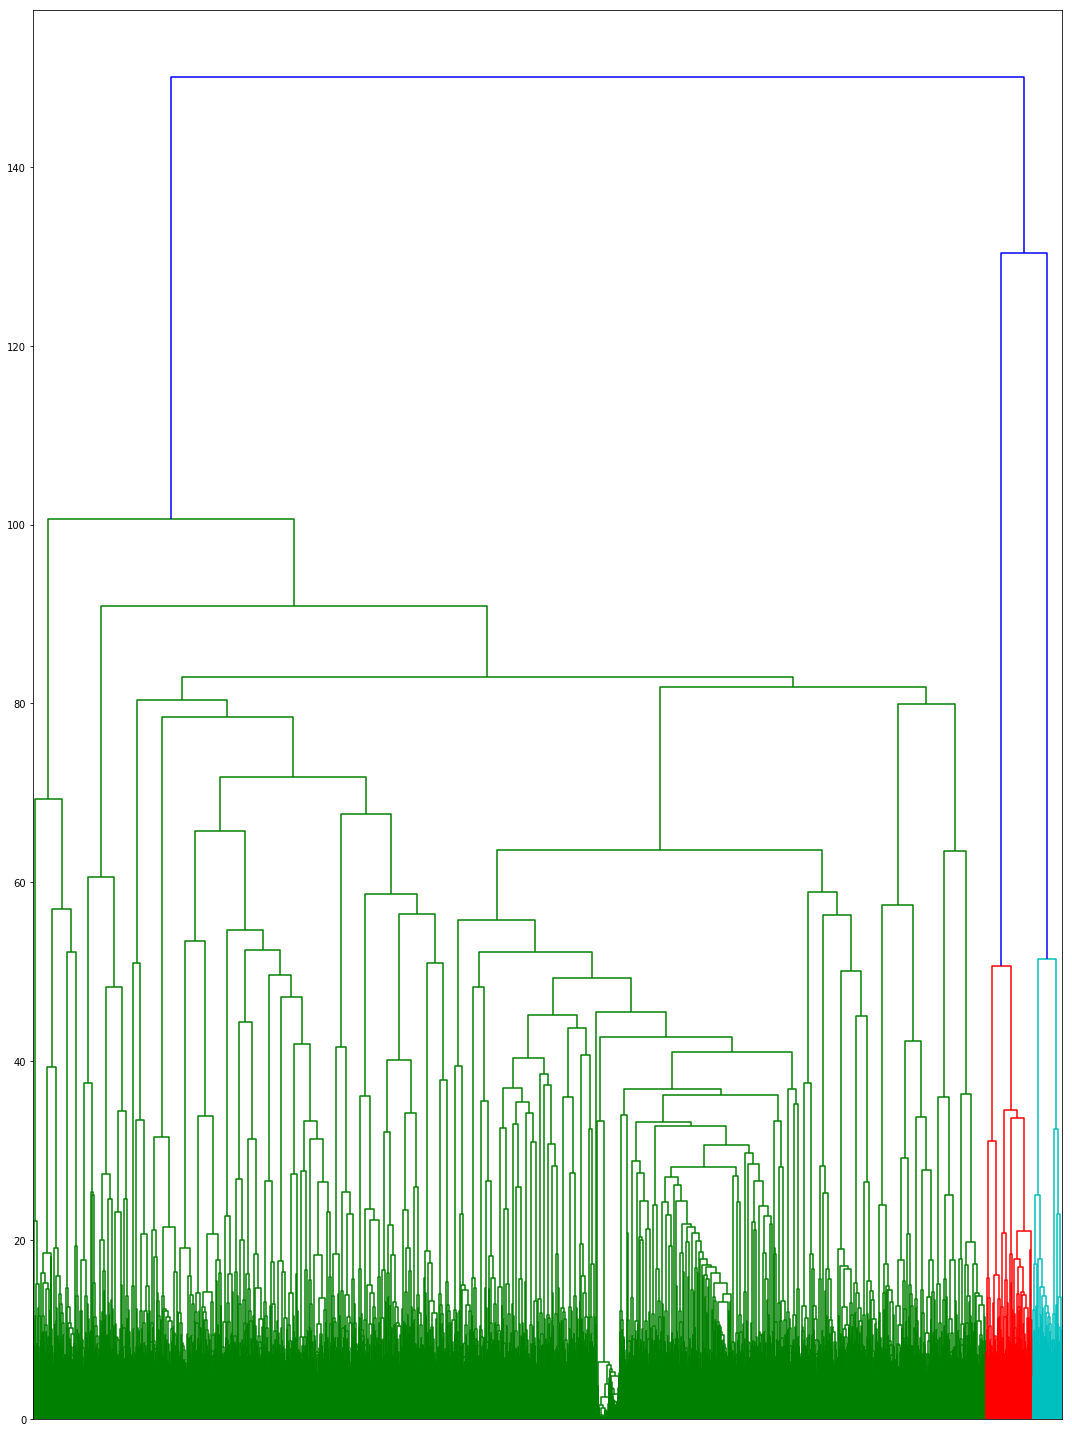

In [36]:
fig,ax = plt.subplots(figsize=(15,20))
ax=dendrogram(Z1)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')
#plt.ylim(60,200) 人为设置 y 轴范围
plt.tight_layout()

In [49]:
%time Z3= linkage(newdata,'complete')

Wall time: 3min 15s


In [50]:
c3, coph_dists3 = cophenet(Z3, pdist(newdata_df)) 
print(c3)

0.41723502024221026


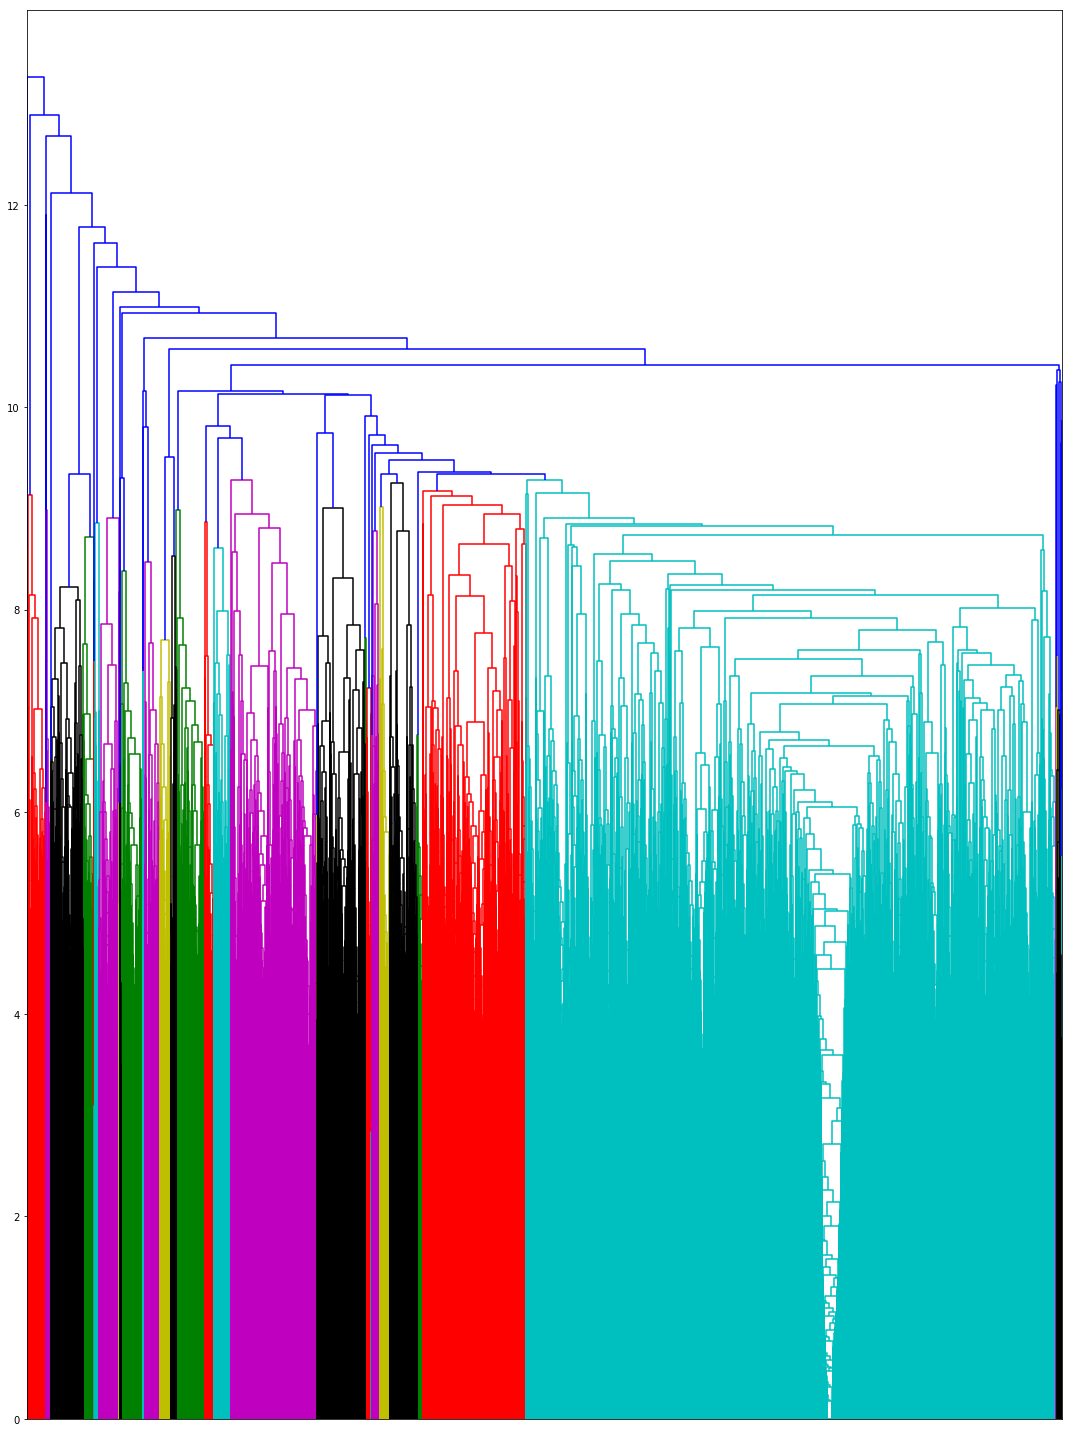

In [57]:
fig,ax = plt.subplots(figsize=(15,20))
ax=dendrogram(Z3)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')

plt.tight_layout()

In [67]:
from scipy.cluster.hierarchy import fcluster
#K = 8
clusters = fcluster(Z3,t=K,criterion='maxclust')

In [68]:
clusters=pd.DataFrame(clusters)

In [69]:
corpus_df=pd.DataFrame(corpus)

In [70]:
corpus_df['clusters']=clusters[0]
newdata_df['clusters']=clusters[0]

In [71]:
newdata_df['clusters'].value_counts()

8    25517
6     1153
2      480
4      123
1       15
7        4
3        3
5        2
Name: clusters, dtype: int64

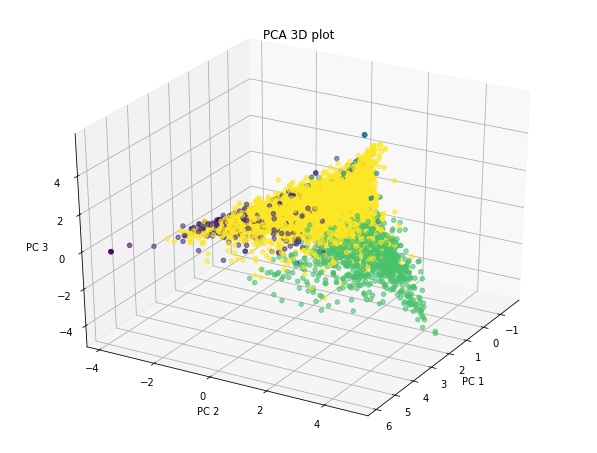

In [75]:
fig=pylab.figure(figsize=(8,6))
ax=Axes3D(fig)

ax.view_init(30,30)
ax.scatter(newdata[:,0],newdata[:,1],newdata[:,2],c=newdata_df['clusters'],alpha=0.6)
ax.set_xlabel('PC 1')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('PCA 3D plot')
#pylab.legend([yellow_dot,green_dot,purple_dot],['cluster 0','cluster 1','cluster 2'])
pylab.draw()
#fig.savefig('pca3d.png',dpi=500)

In [29]:
#cluster_colors={0: '#7570b3', 1: 'orange', 2: '#66a61e'}

#cluster_names={0:'technology',
 #             1:'donation',
  #            2:'entertainment'}

In [68]:
%matplotlib inline
x=newdata[:,0]
y=newdata[:,1]
dataset=dict(x=x,y=y, label=clusters,text=corpus)

In [69]:
pca_df=pd.DataFrame(dataset)
groups = pca_df.groupby('label')

In [70]:
groups.x

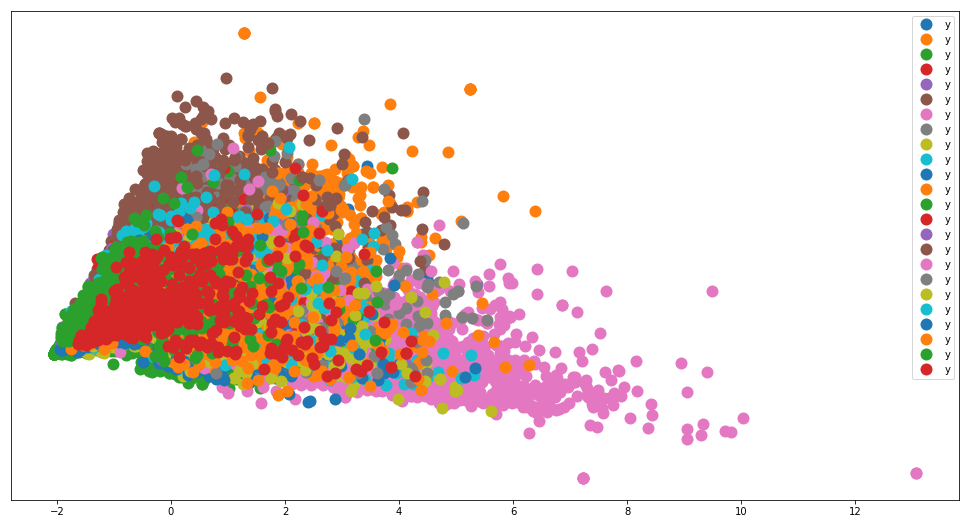

In [77]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17,9))
ax.margins(0.05)

for name, group in groups:
    ax.plot(group['x'], group['y'], marker='o', linestyle='', ms=12, mec='none')
            #,color=cluster_colors)
    ax.set_aspect('auto')
    ax.tick_params(axis='x',
                  which='which',
                  bottom='off',
                  top='off',
                  labelbottom='off')
    ax.tick_params(axis='y',
                 which='both',
                  left='off',
                  top='off',
               labelleft='off')
ax.legend(numpoints=1)

#for i in range(len(pca_df)):
 #   ax.text(pca_df['x'][i],pca_df['y'][i],df['text'][i],size=8)
    
plt.show()

In [107]:
from scipy.cluster.hierarchy import ward, dendrogram, linkage
import matplotlib.pyplot as plt

In [108]:
%time Z= linkage(newdata_df,'ward')

Wall time: 3min 36s


In [110]:
c1, coph_dists1 = cophenet(Z, pdist(newdata_df)) 
print(c1)

0.3661932154741358


In [111]:
%time Z2= linkage(newdata_df)

Wall time: 2min 49s


In [118]:
%time Z3= linkage(newdata_df,'complete')

MemoryError: 

In [116]:
%time c2, coph_dists2 = cophenet(Z2, pdist(newdata_df)) 
print(c2)

MemoryError: 

0.3661932154741358


In [103]:
from scipy.cluster.hierarchy import cophenet 
from scipy.spatial.distance import pdist

In [105]:
c, coph_dists = cophenet(linkage_matrix, pdist(newdata_df)) 
print(c)

0.3661932154741358


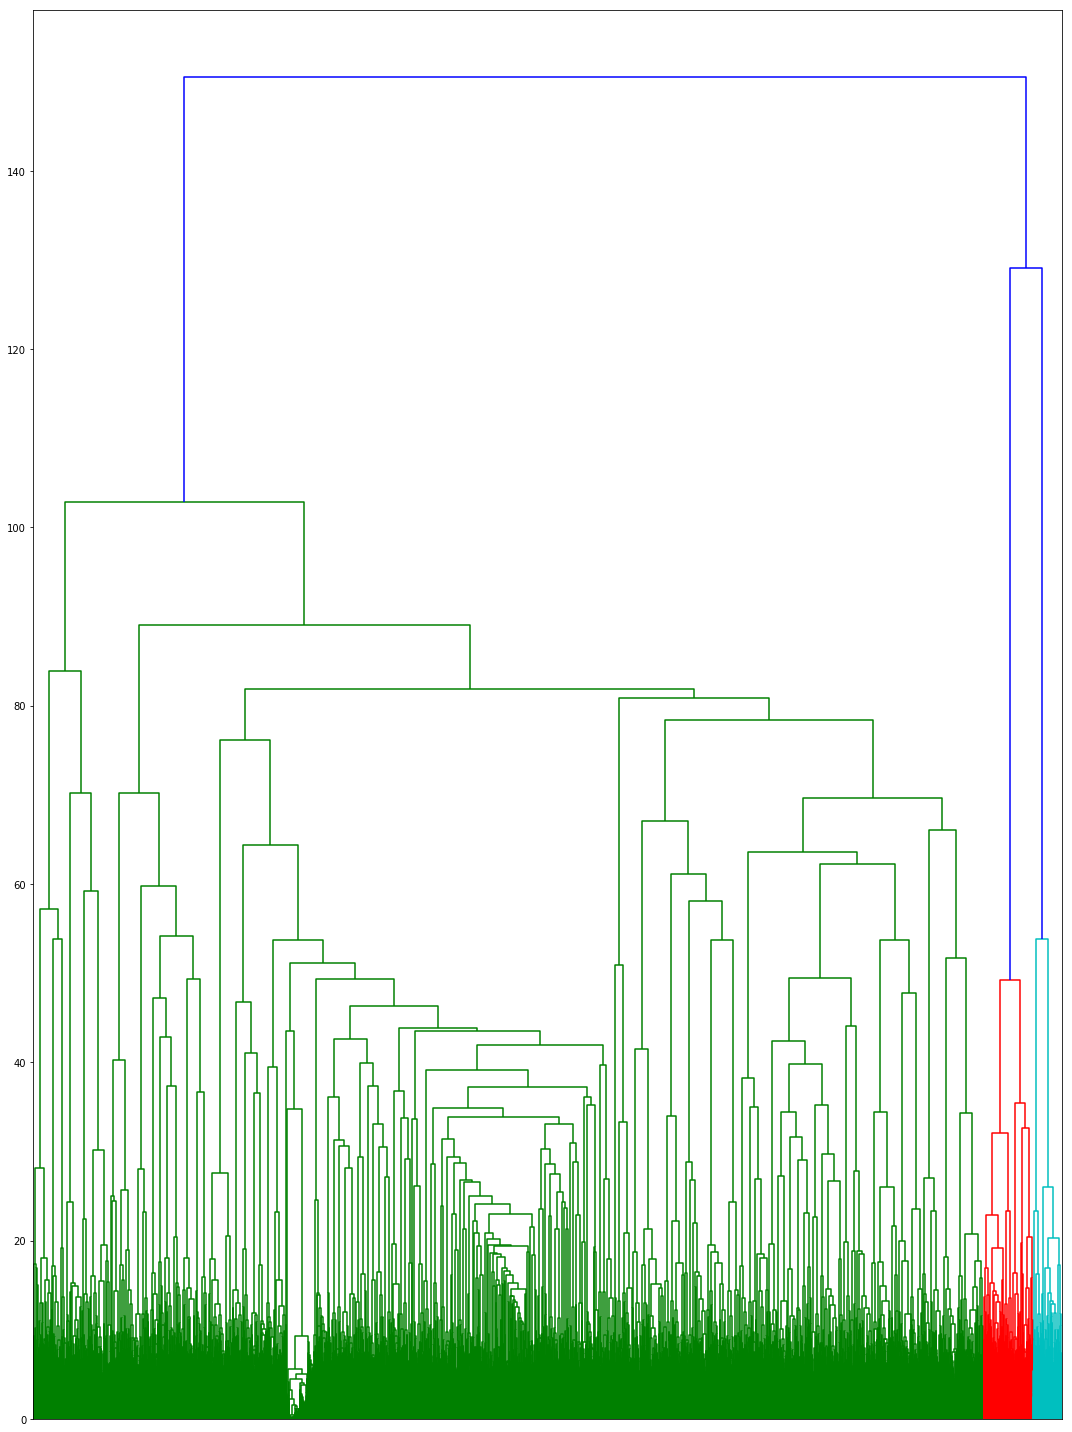

In [102]:
fig,ax = plt.subplots(figsize=(15,20))
ax=dendrogram(linkage_matrix)
plt.tick_params(
    axis='x',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off')

plt.tight_layout()